# Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists('plots'):
    os.mkdir('plots')

In [2]:
regrets_dict = {'CN-UCB': ('',''), 'CN-TS(M=1)': ('',''), 'CN-TS': ('',''), 'CombLinUCB': ('',''), 'CombLinTS': ('','')}

In [3]:
def set_regrets_dict(*r_str_tuple):
    # reset regrets_dict
    for k in regrets_dict:
        regrets_dict[k] = ('','')
    
    for r_str in r_str_tuple:
        if '_CNUCB_' in r_str:
            regrets_dict['CN-UCB'] = (r_str, '.')
        elif '_CNTS(M=1)_' in r_str:
            regrets_dict['CN-TS(M=1)'] = (r_str, 'x')
        elif '_CNTS_' in r_str:
            regrets_dict['CN-TS'] = (r_str, '+')
        elif '_CombLinUCB_' in r_str:
            regrets_dict['CombLinUCB'] = (r_str, 's')
        elif '_CombLinTS_' in r_str:
            regrets_dict['CombLinTS'] = (r_str, 'd')

def plot(T, h, d, m, regrets_dict, save=False):
    
    h1 = r'$h_{1}(\mathbf{x}) = \mathbf{x}^{\top}\mathbf{a}$'
    h2 = r'$h_{2}(\mathbf{x}) = (\mathbf{x}^{\top}\mathbf{a})^{2}$'
    h3 = r'$h_{3}(\mathbf{x}) = \cos(\pi \mathbf{x}^{\top}\mathbf{a})$'
    h4 = r'$h_{4}(\mathbf{x}) = \sin(\pi \mathbf{x}^{\top}\mathbf{a})$'
        
    if h == "h1":
        hidden = h1
    elif h == "h2":
        hidden = h2
    elif h == "h3":
        hidden = h3
    elif h == "h4":
        hidden = h4
    
    plt.style.use('default')
        
    steps=np.arange(1,T+1)
    freq = int(T/10)
    
    for label, value in regrets_dict.items():        
        r_str = value[0]
        marker = value[1]
        if r_str:
            # total_reg is a numpy array (L x T) where L is the number of repeated experiments
            total_reg = np.load('regrets/' + r_str + '.npy')
            ### total_reg = np.load('regrets/' + r_str + '.npy')

            avg_reg = total_reg.mean(axis=0)
            sd_req = total_reg.std(axis=0)

            plt.errorbar(steps, avg_reg, sd_req, errorevery=freq, marker= marker, markevery=freq, label=label, markersize=6, linewidth=2, elinewidth=1, capsize=3)

    # plt.grid(True)
    plt.grid(color='0.85')
    plt.xlabel('Round ($t$)', size = 14)
    plt.ylabel('Cumulative Regret', size = 14)
    plt.title(r'{}, $d$={}, $m$={}'.format(hidden, d, m), size = 14)
    plt.legend(loc='upper left', prop={'size': 12})
    plt.tick_params(labelsize=12)
    
    if save:
        plt.savefig('plots/' + f'{h}-{d}-{m}' + '.png')

In [5]:
T = 2000
d = 80
m = 60
h = 'h3'

In [6]:
#set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}')
# set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}', f'reg_{h}_CNTS_{d}_{m}')
set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}', f'reg_{h}_CNTS(M=1)_{d}_{m}', f'reg_{h}_CNTS_{d}_{m}')

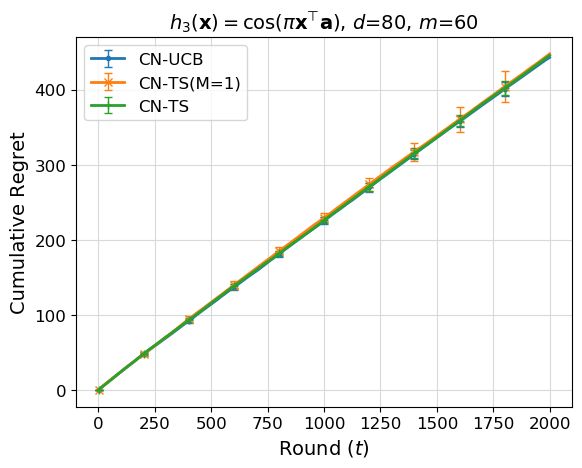

In [7]:
plot(T, h, d, m, regrets_dict, save=True)